<h1><center>NLP für Arabisch mit CAMeL Tools</center></h1>

<img src="assets/banner.png" /><br>
<br>Herzlich willkommen zu dieser kleinen Einführung zum Thema NLP für Arabisch mit CAMeL Tools! In den folgenden Aufgaben werden wir uns mit dem sechsten Vers (Aya) der ersten Sure des Korans beschäftigen. Genauer gesagt werden wir uns Korankommentare unterschiedlicher Autoren ansehen, die sich mit diesem Vers beschäftigt haben.<br>
Wie wir bereits in der Präsentation von Prof. Büssow erfahren haben, scheint für die Textgattung der Korankommentare eine Unterteilung in drei Ansätze möglich: Tradition / Moral, Philologie / Wissenserwerb, Mystik / Erkenntnis.
Der Frage, ob sich im Sprachgebrauch von Korankommentatoren, ihrem Wortschatz und den von ihnen verwendeten Metaphern Hinweise finden lassen, welche diese These stützen, möchten wir heute zuarbeiten. Dabei lernen wir
- das uns zur Verfügung stehende Korpus (https://www.altafsir.com/Tafasir.asp) kennen,
- extrahieren aus dem Korpus ein Sample (<code style="color:#9b0014">tafsir_extractor</code>),
- bereiten dieses Sample auf, analysieren es (<code style="color:#9b0014">CAMeL Tools</code>),
- und stellen den Kernwortschatz graphisch in einer Wortwolke dar (<code style="color:#9b0014">Wordcloud</code>).

Hierbei werden wir bekannte Konzepte, Funktionen und Module, wiederholen und neue Module und ein neues Konzept (das der Klasse), kennenlernen.

**Hinweis:** Module und Klassen werden <b><code style="color:#9b0014">rot</code></b>, Variablen und Instanzen von Klassen <b><code style="color:#4e89b4">blau</code></b>, Funktionen und Methoden <b><code style="color:#ce5d19">orange</code></b> und Attribute <b><code style="color:#9872a2">violett</code></b> hervorgehoben.
<center>Viel Spaß (und Erfolg)!</center>

____

## 1. Überblick über den Datenbestand beschaffen

Wie wir gesehen haben finden sich auf <a href="https://www.altafsir.com">altafsir.com</a> zahlreiche Tafsire (Korankommentare), die sich an Hand eines Dropdown-Menüs durchstöbern und auswählen lassen. Oh Schreck, alles auf Arabisch! Das wir kein Arabisch können, ist an dieser Stelle aber gar nicht so schlimm! Wir können nämlich trotzdem alle Tafsire identifizieren, da im Ordner <code>./assets/</code> eine csv-Datei <code>tafasir.csv</code> hinterlegt ist, die eine Liste aller verfügbaren Tafsire enthält und von der Seite extrahiert (und etwas ergänzt) wurde. Darin finden wir für jeden Tafsir unterschiedliche Angaben, hierunter seine eindeutige Id, die wir bei der Extraktion des Textes benötigen.<br><br>
><b>Aufgabe 1:</b> Wir importieren das Modul pandas. Dann laden wir die Datei <code>./assets/tafasir.csv</code> in einen Dataframe (Trennzeichen beachten!) und machen die Spalte Id zum Index. Zum Schluss lassen wir uns den Dataframe anzeigen.

In [1]:
# Erstellen des Dataframes
import pandas as pd

tafasir = pd.read_csv("./assets/tafasir.csv", sep=";").set_index("Id")

In [2]:
# Ausgabe des Dataframes
tafasir[:7]

,MadhabId,TableName,DateOfDeath,TafsirName,LanguageId,Transliteration,AuthorName
Id,,,,,,,
1,1,Al_Tabari,(ت 310 هـ),جامع البيان في تفسير القرآن/ الطبري,1,Ǧāmiʿ al-bayān fī tafsīr al-Qurʾān,aṭ-Ṭabarī
2,1,Al_Kashaf,(ت 538 هـ),الكشاف/ الزمخشري,1,al-Kaššāf,az-Zamaḫšarī
3,4,Al_Tabrasi,(ت 548 هـ),مجمع البيان في تفسير القرآن/ الطبرسي,1,Maǧmaʿ al-bayān fī tafsīr al-Qurʾān,aṭ-Ṭabarsī
4,1,Al_Razi,(ت 606 هـ),مفاتيح الغيب ، التفسير الكبير/ الرازي,1,"Mafātīḥ al-ġayb, at-tafsīr al-kabīr",ar-Rāzī
5,1,Al_Qurtobi,(ت 671 هـ),الجامع لاحكام القرآن/ القرطبي,1,al-Ǧāmiʿ li-aḥkām al-Qurʾān,al-Qurṭubī
6,1,Al_Baydawi,(ت 685 هـ),انوار التنزيل واسرار التأويل/ البيضاوي,1,Anwār at-tanzīl wa-asrār at-taʾwīl,al-Bayḍāwī
7,1,Ibn_Kathir,(ت 774 هـ),تفسير القرآن العظيم/ ابن كثير,1,Tafsīr al-Qurʾān al-ʿaẓīm,Ibn Kaṯīr


Als Ergebnis erhalten wir eine Tabelle, mit der wir leichter herausfinden können, welche Id ein bestimmter Tafsir hat. Da uns in unserer Forschungsfrage ein paar Tafsire ganz besonders interessieren, haben wir deren Namen in der Liste <code style="color:#4e89b4">random_tafsir</code> hinterlegt. Und damit wir nicht alle den selben Tafsir bearbeiten, führen wir den folgenen Code aus, um einen zufälligen Tafsir zugewiesen zu bekommen:

In [3]:
import random

random_tafsir = ["Muqātil b. Sulaymān", "Ibn ʿAǧība", "aš-Šaʿrawī", "az-Zamaḫšarī", "aṭ-Ṭabarī", "Abū as-Suʿūd", "ar-Rāzī"]
random.choice(random_tafsir)

'aš-Šaʿrawī'

><b>Aufgabe 2:</b> Wir suchen für unseren Tafsir die Id. Hierfür benutzen wir </b> <code style="color:#9872a2">.loc[]</code> und suchen nach einer Übereinstimmung in der Spalte <code style="color:#9aa83a">AuthorName</code>.<br><i>Tipp:</i> Copy & paste für den Tafsirnamen nutzen!

In [4]:
tafasir.loc[tafasir["AuthorName"] == "al-Bayḍāwī"]

,MadhabId,TableName,DateOfDeath,TafsirName,LanguageId,Transliteration,AuthorName
Id,,,,,,,
6,1,Al_Baydawi,(ت 685 هـ),انوار التنزيل واسرار التأويل/ البيضاوي,1,Anwār at-tanzīl wa-asrār at-taʾwīl,al-Bayḍāwī


Nun da wir wissen, welche Id unser Tafsir hat und dass wir uns uns mit Sure 1, Aya 6 beschäftigen wollen, können wir zum nächsten Schritt übergehen und den entsprechenden Text von der Website extrahieren.

___________

# 2. Sample beschaffen
Im nächsten Schritt werden wir das Modul <code style="color:#9b0014">tafsir_extractor</code> importieren, mit dessen Hilfe wir uns den Text unseres Tafsirs erscrapen. Um das Modul kennenzulernen lohnt es sich, die eingebaute Hilfsfunktion <code style="color:#ce5d19">help()</code> auf das Modul anzuwenden.

In [5]:
import tafsir_extractor as te
help(te)

Help on module tafsir_extractor:

NAME
    tafsir_extractor - toolset for extracting specific passages from the corpus provided on altafsir.com

CLASSES
    builtins.object
        tafsir_sample
    
    class tafsir_sample(builtins.object)
     |  tafsir_sample(TafsirId, Sura, Aya)
     |  
     |  # Creating a Base class
     |  
     |  Methods defined here:
     |  
     |  __init__(self, TafsirId, Sura, Aya)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  collect_data(self)
     |      collects given Aya from Sura from a specified Tafsir
     |      returns: string
     |  
     |  write_data(self, path='./data/')
     |      extracts scraping result to text file
     |      returns: None
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     |      

Aus dem Hilfe-Output können wir entnehmen, dass das Modul eine Objektklasse namens <code style="color:#9b0014">tafsir_sample</code> enthält. Was aber ist eigentlich ein Objekt und was eine Klasse? Es lohnt sich ein kurzer Exkurs (der sich am Ende dieses Notebooks findet).

<h2>2.1 Ein Sample von altafsir.com extrahieren</h2>
Zurück zu unserem Modul <code style="color:#9b0014">tafsir_extractor</code>: Wie oben gesehen, bringt das Modul die für Samples vorgesehene Objektklasse <code style="color:#9b0014">tafsir_sample</code> mit, die uns das Leben etwas leichter machen soll. Damit wir ein Objekt dieser Klasse initialisieren können, müssen wir bei der Initialisierung für die Attribute <code style="color:#9872a2">TafsirId</code>, <code style="color:#9872a2">Sura</code> und <code style="color:#9872a2">Aya</code> Werte übergeben.
Da wir bereits bei der Initialisierung alle notwendigen Informationen zum Extrahieren an unser neues Objekt <code style="color:#4e89b4">sample</code> übergeben, können wir mit der Methode <code style="color:#ce5d19">collect_data()</code> automatisch den Text für die gewünschte Stelle extrahieren. Dieser wird dann automatisch im Attribut <code style="color:#9872a2">Text</code> unseres Sample-Objekts gespeichert

><b>Aufgabe 4:</b> Wir initialisieren unser Sample-Objekt. Bitte Attributnamen durch Werte ersetzen.

In [6]:
#import tafsir_extractor as te
#sample = te.tafsir_sample(TafsirId, Sura, Aya)
#sample.collect_data()

## 2.2 Alternativ: aus Datei laden
Sollte es aus irgendwelchen Gründen mit der Extraktion nicht klappen, können wir auf die mitgelieferten Datensätze zurückgreifen.<br>

><b>Aufgabe 4 (Alternative):</b> Wir initialisieren unser Sample-Objekt. Bitte Attributnamen durch Werte ersetzen.

In [7]:
import tafsir_extractor as te
sample = te.tafsir_sample(103, 1,6)
with open(f"./data/{sample.TafsirId}-{sample.Sura}_{sample.Aya}.txt", "r", encoding="utf-8") as f:
    sample.Text = f.read()

Den somit erhaltenen Text können wir uns ganz einfach anzeigen lassen:

In [8]:
sample.Text

'لا أذكر ما قاله الأستاذ الإمام في البسملة من حيث لفظها وإعرابها، وهل هي آية أو جزء آية من الفاتحة أو ليست منها فإنّ الخلاف في ذلك مشهور وقد اختصر الأستاذ القول فيه اختصاراً وقال: إنّها على كلّ حال من القرآن فنتكلّم عليها كسائر الآيات.وأقول الآن: أجمع المسلمون على أنّ البسملة من القرآن وأنّها جزء آية من سورة النمل. واختلفوا في مكانها من سائر السور فذهب إلى أنّها آية من كل سورة علماء السلف من أهل مكّة فقهائهم وقرّائهم ومنهم: ابن كثير، وأهل الكوفة، ومنهم: عاصم والكسائيّ من القرّاء، وبعض الصحابة والتابعين من أهل المدينة والشافعيّ في الجديد وأتباعه والثوريّ وأحمد في أحد قولَيه والإماميّة ومن المرويّ عنهم ذلك من علماء الصحابة عليّ وابن عباس وابن عمر وأبو هريرة ومن علماء التابعين سعيد ابن جبير وعطاء والزهريّ وابن المبارك وأقوى حججهم في ذلك: إجماع الصحابة ومَنْ بعدهم على إثباتها في المصحف أوّل كلّ سورة سوى سورة براءة (التوبة) مع الأمر بتجريد القرآن عن كلّ ما ليس منه؛ ولذلك لم يكتبوا (آمين) في آخر الفاتحة. وأحاديث منها ما أخرجه مسلم في صحيحه من حديث أنس قال: قال رسول الله - صلى الله عليه وسلم 

____

# 3 Preprocessing
Bevor wir den Text analysieren können, müssen wir ihn zunächst vorverarbeiten, um ihn in eine für unser Toolkit "saubere" Form zu überführen.

## 3.1 Normalisierung der Daten
In einem ersten Schritt möchten wir den Text normalisieren, das heißt ihn von Ungleichmäßigkeiten im Zeichensatz und von Inhalten, die für unsere Fragestellung irrelevant sind, befreien. In diesem Fall möchten wir:
- alle Unicode-Zeichen normalisieren (z.B. `\xa0` zu Leerzeichen),
- alle Diakritischen Zeichen,
- Koranzitate, Querverweise auf andere Koranverse und Eulogien
- sowie alle Zeichen, die nicht zu den Konsonanten und Halbvokalen des Arabischen Kernalphabets gehören,

entfernen. Hierfür können wir einige Funktionen aus <a href="https://camel-tools.readthedocs.io/en/latest/">CAMeL Tools</a> importierten. Für das Entfernen von Koranzitaten etc. müssen wir aber auf eigene Funktionen zurückgreifen. So ist der Code allerdings noch lauffähig. Wir werfen einen Blick auf <b>Aufgaben 6</b> und <b>7</b> weiter unten um den Code zu vervollständigen.


In [9]:
from camel_tools.utils.normalize import normalize_unicode
from camel_tools.utils.dediac import dediac_ar
import re

def reduce_charset(text):
    """Entfernt alle Zeichen aus dem Text, die nicht zwischen
    'X' und 'Y' liegen"""

    chars_excluded = '[^\u0621-\u064A ]'
    text = re.sub(chars_excluded, ' ', text)
    
    return text

def remove_aya(text):
    """Entfernt alle aus dem Koran zitierten Textstellen"""
    
    aya = '\{(.*?)\}'####
    text = re.sub(aya, '', text)

    return text

def remove_ref(text):
    """Entfernt alle Verweise auf weitere Verse im Koran
    aus dem Text"""
    
    ref = '\[(.*?)\]'
    text = re.sub(ref, '', text)
    
    return text

def remove_eulogies(text):
    """Entfernt Eulogien (Segenssprüche) aus dem Text"""
    
    with open("./assets/eulogies.txt", encoding="utf-8") as f:
        eulogies = f.read().splitlines()
    
    for eulogy in eulogies:
        text = re.sub(eulogy, '', text)
    
    return text

def normalizer(string):
    """Wendet die Gewünschten Normalisierungsschritte an"""

    # Unicode-Zeichensatz normalisieren
    str_norm = normalize_unicode(string)
    
    # Diakritika aus dem Text entfernen
    str_norm = dediac_ar(str_norm)

    # Koranzitate, Verweise und Eulogien entfernen
    str_norm = remove_aya(str_norm)
    str_norm = remove_ref(str_norm)
    str_norm = remove_eulogies(str_norm)
    
    # Zeichensatz auf relevante Zeichen reduzieren
    str_norm = reduce_charset(str_norm)

    return str_norm

><b>Aufgabe 5:</b> In der Funktion <code style="color:#ce5d19">reduce_charset()</code> wird durch die Variable <code style="color:#4e89b4">chars_excluded</code> ein Zeichenbereich angegeben. Wie lauten die Arabischen Namen der beiden Buchstaben, die diesen Zeichenbereich begrenzen? Wir ersetzen im DocString <code>X</code> und <code>Y</code> durch die entsprechenden Namen. <li><i>Tipp:</i> <a href="https://unicode-table.com/de/">Unicode Zeichentabelle</a>

><b>Aufgabe 6:</b> Mit der Funktion <code style="color:#ce5d19">remove_aya()</code> sollen alle Koranzitate aus dem Text entfernt werden. Koranzitate sind sehr leicht identifizierbar, da sie von geschweiften Klammern (<code>{}</code>)umgeben werden. Wie lautet ein möglicher regulärer Ausdruck, den wir der Variable <code style="color:#4e89b4">aya</code> zuweisen müssen, um alle Koranzitate zu erfassen?<li><i>Tipp:</i> Das Tool <a href="https://regex101.com/">regular expressions 101</a> ist sehr hilfreich, aber Vorsicht: Die Darstellung von Markierungen bei rechtsläufiger Schrift kann irritieren!<br><li><i>Hinweis:</i> Text zum Testen kann über <code style="color:#4e89b4">sample</code><code>.</code><code style="color:#9872a2">Text</code> abgerufen werden und von dann kopiert werden.

><b>Aufgabe 7:</b> Analog zu <b>6</b>, nur dass Querverweise von eckigen Klammern (<code>[]</code>) umgeben werden. Anschließend führen wir die Zelle aus.

Jetzt wo der Code vollständig ist, können wir den <code style="color:#ce5d19">normalizer()</code> auf unseren Text anwenden. Hier wird nun ein Vorzug von Objekten sichtbar: wir können unserem Sample einfach ein neues Attribut zuweisen, das wir <code style="color:#9872a2">Normalized</code> nennen und in dem wir den normalisierten Text speichern. So können wir den Originaltext für (un-)vorhergesehene Fälle aufbewahren, ohne ihn zu überschreiben.

In [10]:
sample.Normalized = normalizer(sample.Text)

## 3.2 Tokenisierung
Nun trennen wir mit Hilfe des in CAMeL Tools enthaltenen Tokenizers unseren Text (im Augenblick ein langer String) in eine Liste aller Einzelwörter auf, die wir in unserem Sample in einem neuen Attribut namens <code style="color:#9872a2">Tokenized</code> speichern.

In [11]:
from camel_tools.tokenizers.word import simple_word_tokenize

sample.Tokenized = simple_word_tokenize(sample.Normalized)

## 3.3 Disambiguierung
Ein besonders vielseitiges und starkes Tool, das für unsere weiteren Schritte von zentraler Bedeutung ist, ist der Maximum Likelihood Disambiguator (MLED). Dieses Tool greift auf mitgelieferte Datensätze zurück und berechnet damit für jeden Token, um was für ein Lemma, in welcher Form usw. es sich handelt. Eine hilfreiche Übersicht über die berechneten Parameter findet sich in der Dokumentation unter <a href="https://camel-tools.readthedocs.io/en/latest/reference/camel_morphology_features.html#camel-morphology-features">CAMeL Morphology Features</a>.

In [12]:
from camel_tools.disambig.mle import MLEDisambiguator

# Eine Instanz des Maximum Likelihood Disambiguator wird aufgerufen
mle = MLEDisambiguator.pretrained()

# Der Text wird in tokenisierter Form übergeben
sample.Disambiguated = mle.disambiguate(sample.Tokenized)

Wirft man einen ersten Blick auf den Output des MLED, so wirkt er zugegebenermaßen etwas verwirrend. Dem schafft die folgende Grafik abhilfe, die den Output etwas aufschlüsselt und zugänglicher macht.<br>
<center><img src="assets/MLED_output_tree.png" /><br></center>
<b>Bildbeschreibung:</b> der MLED übergibt uns eine Liste, in der sich für jeden Token ein Objekt der Klasse <code style="color:#4e89b4">DisambiguatedWord</code> befindet. Dieses Objekt hat zwei Attribute: <code style="color:#9872a2">word</code> (der Token selbst) sowie <code style="color:#9872a2">analyses</code> (eine Liste). <code style="color:#9872a2">analyses</code> beinhaltet <code style="color:#4e89b4">ScoredAnalysis</code>-Objekte. In unserem Fall ist es immer nur ein einziges und der Index-Wert somit immer <code>0</code> (in anderen Anwendungsfällen ist auch > 1 möglich). Dieses Objekt hat zwei Attribute: <code style="color:#9872a2">score</code> (ein Float-Wert) und <code style="color:#9872a2">analysis</code> (ein Dictionary). In diesem Dictionary befinden sich die für uns relevanten Daten wie Lemma, Part-Of-Speech-Tag, Wortstamm etc.

><b>Aufgabe 8:</b> Wir lassen uns für einen beliebigen Token den Parameter <code style="color:#8ba834">stemgloss</code> ausgeben. Hierdurch erhalten wir die englische Bedeutung für das einem Token zugrunde liegende Stammwort.

In [13]:
sample.Disambiguated[2].analyses[0].analysis["stemgloss"]

'what'

Damit wir Stopwörter gleich Stopwörter herausfiltern können, fügen wir für jeden Token dem Objekt <code style="color:#4e89b4">DisambiguatedWord</code> ein weiteres Attribut <code style="color:#9872a2">normalized</code> hinzu, welches das Lemma in normalisierter Form enthält.

In [14]:
from camel_tools.utils.normalize import normalize_alef_ar
from camel_tools.utils.dediac import dediac_ar

for i, val in enumerate(sample.Disambiguated):
    normalized = normalize_alef_ar(dediac_ar(val.analyses[0].analysis["lex"]))
    sample.Disambiguated[i].normalized = normalized

## 3.4 Filtern unerwünschter Wörter
Bisher haben wir mit einem Datensatz gearbeitet, der nach wie vor von Wörtern durchsetzt ist, die für andere Fragestellungen durchaus interessant sein können, in unserem Fall durch ihre Häufigkeit nur den "interessanten" Wortschatz überdecken. Eine Kombination aus Filterung mittels Part-Of-Speech-Tags und Stopwortlisten hat sich bisher als ziemlich zuverlässig erwiesen.
### 3.4.1 Durch Part-Of-Speech-Tags
Bevor wir jedoch filtern, erzeugen wir eine harte Kopie des bestehenden Datensatzes, falls uns zu einem späteren Zeitpunkt doch noch andere Aspekte unseres Samples interessieren sollten. Mit dieser harten Kopie arbeiten wir nun weiter und Filtern unerwünschte Wortarten heraus.

In [15]:
sample.Filtered = sample.Disambiguated.copy()

In [16]:
for i in enumerate(sample.Filtered):
    if sample.Filtered[i[0]].analyses[0].analysis["pos"] in ("conj", "prep", "pron", "abbrev", "pron_dem", "conj_sub"):
        sample.Filtered.pop(i[0])

### 3.4.2 Mittels Stopwortliste
In einem zweiten Schritt laden wir nun die Inhalte unserer Stopwortlisten in eine Liste. Die Liste übergeben wir dann der Funktion <code style="color:#ce5d19">del_stopwords()</code> gemeinsam mit unserer Liste <code style="color:#4e89b4">sample</code><code>.</code><code style="color:#9872a2">Filtered</code>, die dann um die Stopwörter bereinigt wird.

In [17]:
# Stopwortliste aus NLTK extrahiert
with open("./assets/stopwords_nltk.txt", "r", encoding="utf-8") as sf:
    stopwords_nltk = normalize_alef_ar(dediac_ar(sf.read()))

# Zusätzliche Stopwörter
with open("./assets/stopwords_extra.txt", "r", encoding="utf-8") as sf:
    stopwords_extra = normalize_alef_ar(dediac_ar(sf.read()))

stopwords = stopwords_nltk + " " + stopwords_extra
stopwords = stopwords.split()

In [18]:
def del_stopwords(token_list, stopwords_list):
    """Entfernt alle in der Stopwortliste vorhandenen Einträge
    aus dem Datensatz der disambiguierten Tokens."""

    for i, token in enumerate(token_list):
        if token.normalized in stopwords_list:
            token_list.pop(i)
        else:
            pass
    
    return len(token_list)

Da nicht bei jedem Durchgang auch wirklich alle Stopwörter erfasst werden, wird der Vorgang solange durchgeführt, bis sich die Länge des verbleibenden Tokensatzes nicht mehr verändert

In [19]:
while True:
    if len(sample.Filtered) == del_stopwords(sample.Filtered, stopwords):
        print(len(sample.Filtered))
        break
    else:
        del_stopwords(sample.Filtered, stopwords)

10325


____

## 4. Visualisierung
Unser Datensatz ist nun bereinigt und bereit für die graphische Darstellung! In erster Linie interessieren uns die zentralen Begriffe im Sprachgebrauch der Korankommentatoren. Deshalb erstellen wir uns als eine Wortwolke auf Basis der Häufigkeiten für den Parameter <code style="color:#8ba834">lex</code>, der die Lemmata der Token beinhaltet, sowie eine für den Parameter <code style="color:#8ba834">stemgloss</code>, der die englischen Bedeutungen für die den Token zugrundeliegenden Stammwörtern beinhaltet.
### 4.1 Häufigkeiten von Lemmata

In [20]:
# für Häufigkeitsverteilungen
from collections import Counter

# Für Grafik
import matplotlib.pyplot as plt          
from wordcloud import WordCloud

# Für die korrekte Darstellung
# arabischer Schrift in Grafiken
from arabic_reshaper import reshape
from bidi.algorithm import get_display

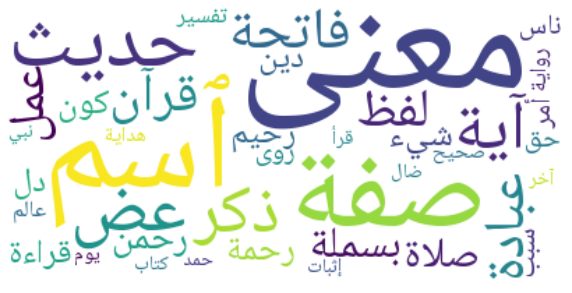

In [21]:
# Auswahl des gewünschten Parameters
parameter = "lex"

# Korrektur der Darstellung arab. Buchstaben
rtl = lambda w: get_display(reshape(f'{w}'))

# Auswahl aller Werte durch 'parameter' bestimmte Werte mittles Listen-Abstraktion,
# Berechnung der Häufigkeiten, Umwandlung von Tuples in Dictionary
counter_input = [v.analyses[0].analysis[f"{parameter}"] for v in sample.Filtered]
counter_output = Counter(counter_input).most_common(40)
counts = {rtl(k):v for k, v in counter_output}
counts_ltr = {k:v for k, v in counter_output}


# Ausgabe der Häufigkeiten in Datei
with open(f"./output/{sample.TafsirId}-{sample.Sura}_{sample.Aya}_{parameter}_freqs.csv", 'w', encoding="utf-8") as f:
    for key in counts_ltr.keys():
        f.write("%s, %s\n" % (key, counts_ltr[key]))


# Angabe des Font-Files zur Darstellung arab. Buchstaben
# und Ausgabe der Wortwolke in Datei und Plot
font_file = './assets/fonts/NotoNaskhArabic-Regular.ttf'

wordcloud = WordCloud(font_path=font_file,
                      background_color="white",
                      width=400,
                      height=200).generate_from_frequencies(counts)
wordcloud.to_file(f"./output/{sample.TafsirId}-{sample.Sura}_{sample.Aya}_{parameter}_wc.png")

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 4.2 Häufigkeiten von Stammbedeutungen

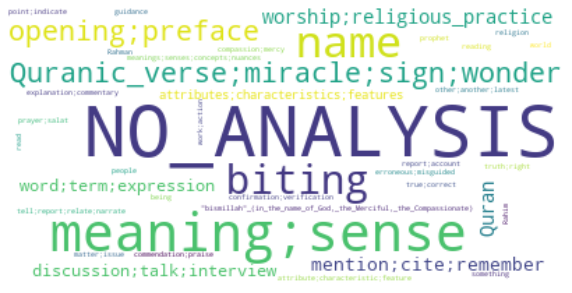

In [22]:
# Auswahl des gewünschten Parameters
parameter = "stemgloss"


# Auswahl aller Werte durch 'parameter' bestimmte Werte mittles Listen-Abstraktion,
# Berechnung der Häufigkeiten, Umwandlung von Tuples in Dictionary
counter_input = [v.analyses[0].analysis[f"{parameter}"] for v in sample.Filtered]
counter_output = Counter(counter_input).most_common(40)
counts = {k:v for k, v in counter_output}


# Ausgabe der Häufigkeiten in Datei
with open(f"./output/{sample.TafsirId}-{sample.Sura}_{sample.Aya}_{parameter}_freqs.csv", 'w', encoding="utf-8") as f:
    for key in counts.keys():
        f.write("%s, %s\n" % (key, counts[key]))


# Ausgabe der Wortwolke in Datei und Plot
wordcloud = WordCloud(background_color="white",
                      width=400,
                      height=200).generate_from_frequencies(counts)
wordcloud.to_file(f"./output/{sample.TafsirId}-{sample.Sura}_{sample.Aya}_{parameter}_wc.png")

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<center><h1>Exkurs: Klassen</h1></center>
Werfen wir einen kurzen Blick auf das Foto, so erkennen wir unschwer, dass es sich bei all den abgebildeten Vierbeinern, so sehr sie sich auch unterscheiden mögen, um Hunde handelt. Deshalb sagen wir, dass sie der Klasse <code style="color:#9b0014">Hunde</code> angehören. Deshalb ist jeder einzelne Vierbeiner eine Instanz des Objekttyps "Hund".
<center><img src="assets/Collage_of_Nine_Dogs.jpg" width=300 /></center><br>
Zudem haben Hunde bestimmte Eigenschaften wie <code style="color:#9872a2">Größe</code>, <code style="color:#9872a2">Fellfarbe</code> oder <code style="color:#9872a2">Schnauzentyp</code>. Diese Eigenschaften nennen wir code style="color:#9872a2">Attribute</code>.<br>
Hunde haben aber auch bestimmte Fähigkeiten, für die sie von vielen Menschen geliebt werden: Sie können zum Beispiel mit ihrer Nase <code style="color:#ce5d19">spüren()</code>, können <code style="color:#ce5d19">bellen()</code> oder <code style="color:#ce5d19">sabbern()</code>. All diese Fähigkeiten sind im Prinzip Funktionen, da sie aber zur Klasse <code style="color:#9b0014">Hunde</code> gehören, nennen wir sie <code style="color:#ce5d19">Methoden</code>.<br>
Lasst uns nun diese Beispielklasse erstellen:

In [23]:
# Wir definieren eine neue Klasse Namens "Hunde"
class Hunde:
    # wird eine Instanz von Hunde, also ein Hund, initialisiert
    # müssen die Attribute Größe, Fellfarbe und Schnauzentyp angegeben werden
    def __init__(self, groesse, fellfarbe, schnauzentyp):
        self.groesse = groesse
        self.fellfarbe = fellfarbe
        self.schnauzentyp = schnauzentyp
        self.sabbern()
        self.bellen()

# ein Hund kann bellen, sabbern und sitz machen.
# Damit ihm aber klar wird, dass genau er gemeint ist
# müssen wir ihn bestärken, indem wir immer 
# "Du! Ja, Bello! Fein, Du Bello!" sagen.
# Und das machen wir jedes mal wieder durch self ...
    def bellen(self):
        print("...Wuff Wuff!")

    def sabbern(self):
        print("...sabbert...")

    def sitz(self):
        print("...macht Sitz...")

Wir haben nun die Klasse <code style="color:#9b0014">Hunde</code> erstellt und können unseren ersten Hund nach Hause holen/initialisieren. Diesen würden wir gerne <code>bello</code> nennen. Bello ist 40 cm groß, hat braunes Fell und eine Stupsnase.

In [24]:
Bello = Hunde(120, "braun", "gedrungen")

...sabbert...
...Wuff Wuff!


Bello ist zuhause angekommen und das erste was er macht ist natürlich: sabbern und bellen... Um zu sehen, ob Bello auch auf unser Kommando hört, sagen wir ihr ihm, er soll Sitz machen:

In [25]:
Bello.sitz()

...macht Sitz...


Wenigstens das klappt. Bei genauerem hinsehen ist uns aufgefallen, dass Bello blaue Augen hat. Deshalb bekommt Bello ein weiteres Attribut:

In [26]:
Bello.augenfarbe = "blau"

Wir wissen nun also, dass Bello ein Objekt der Klasse <code style="color:#9b0014">Hunde</code> ist, das verschiedene <code style="color:#9872a2">Attribute</code> und <code style="color:#ce5d19">Methoden</code> hat. Da die einzelnen Attribute in Form eines Dictionaries gespeichert werden, lassen wir uns zum Abschluss noch einmal alle Attribute unseres lieben Bellos anzeigen:

In [27]:
Bello.__dict__

{'groesse': 120,
 'fellfarbe': 'braun',
 'schnauzentyp': 'gedrungen',
 'augenfarbe': 'blau'}